In [82]:
import pandas as pd
from sklearn.utils import shuffle
df = pd.read_csv("toy_dataset1.csv")


In [83]:



df.head()

,Age,Income,Illness
0,41,40367,No
1,54,45084,No
2,42,52483,No
3,40,40941,No
4,46,50289,No


In [84]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [85]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = df["Illness"] = encoder.fit_transform(df['Illness'])





In [86]:
x

array([[    41,  40367],
       [    54,  45084],
       [    42,  52483],
       ...,
       [    46,  68803],
       [    33,  99108],
       [    36, 110569]], dtype=int64)

In [87]:
df.head()

,Age,Income,Illness
0,41,40367,0
1,54,45084,0
2,42,52483,0
3,40,40941,0
4,46,50289,0


In [88]:
#y = df['Illness']
y 

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
x.shape
x

array([[    41,  40367],
       [    54,  45084],
       [    42,  52483],
       ...,
       [    46,  68803],
       [    33,  99108],
       [    36, 110569]], dtype=int64)

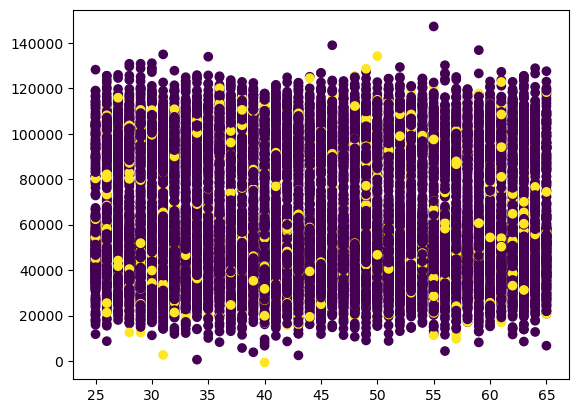

In [90]:
import matplotlib.pyplot as plt

# Assuming 'x' is a pandas DataFrame
plt.scatter(x[:,0],x[:,1],c=y)



In [91]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [92]:
import numpy as np
clf.fit(x,y)

LogisticRegression()

<Axes: >

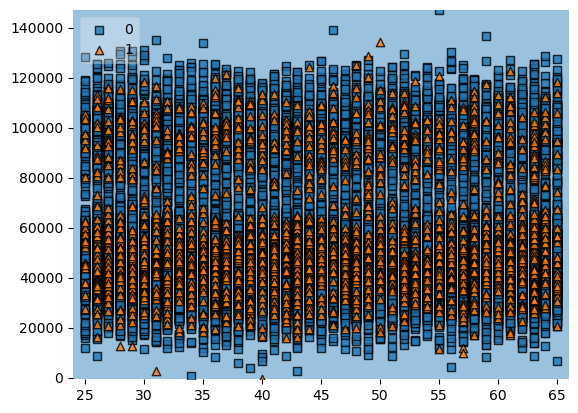

In [93]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.astype('int'), clf, legend=2)

In [94]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x,y,scoring='accuracy',cv=5))

0.9197752096224189

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
X_trf = poly.fit_transform(x)

In [96]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=5))

0.9198129241236446

In [97]:
def plot_decision_boundary(X, y, degree=1):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf, y)
    
    accuracy = np.mean(cross_val_score(clf, X_trf, y, scoring='accuracy', cv=10))
    
    # Generate a meshgrid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.5)
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    
    plt.title(f"Decision Boundary (Degree={degree}, Accuracy={accuracy:.2f})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [98]:
plot_decision_boundary(x,y)

MemoryError: Unable to allocate 463. GiB for an array with shape (14782600, 4200) and data type float64